#ChatGPT on T5 base

In [ ]:
!pip install transformers
!pip install sentencepiece

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:

device = "cuda"

tokenizer = AutoTokenizer.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base")
model = AutoModelForSeq2SeqLM.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base").to(device)

def paraphraseT5(
    question,
    num_beams=5,
    num_beam_groups=5,
    num_return_sequences=5,
    repetition_penalty=10.0,
    diversity_penalty=3.0,
    no_repeat_ngram_size=2,
    temperature=0.7,
    max_length=250
):
    input_ids = tokenizer(
        f'paraphrase: {question}',
        return_tensors="pt", padding="longest",
        max_length=max_length,
        truncation=True,
    ).input_ids
    input_ids = input_ids.to(device)

    outputs = model.generate(
        input_ids, temperature=temperature, repetition_penalty=repetition_penalty,
        num_return_sequences=num_return_sequences, no_repeat_ngram_size=no_repeat_ngram_size,
        num_beams=num_beams, num_beam_groups=num_beam_groups,
        max_length=max_length, diversity_penalty=diversity_penalty
    )

    res = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return res


In [ ]:
text = "I'm sorry, I don't understand. Could you please rephrase?"

In [ ]:
paraphraseT5(text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


["I'm not sure what you're talking about. Can you clarify?",
 'Can you provide a clarification for my question?',
 'Could you clarify the meaning of "I don\'t understand"?',
 'Please rephrase me to convey an alternative expression.',
 "Would it be possible for you to rephrase? I'm sorry, couldn’t find the right answer."]

*italicised text*#Pegasus
doesnt work anymore

In [ ]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
model_name = 'tuner007/pegasus_paraphrase'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

def paraphrase_pegasus(input_text,num_return_sequences=50,num_beams=10):
  batch = tokenizer([input_text],truncation=False,padding='longest',max_length=200, return_tensors="pt").to(torch_device)
  translated = model.generate(**batch,max_length=200,num_beams=num_beams, num_return_sequences=num_return_sequences, temperature=1.5)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  return tgt_text

In [ ]:
num_beams = 10
num_return_sequences = 10
context = "Curiosity can help you fuel your natural enthusiasm to explore and discover, stay open, and follow your passion. Staying curious is important for becoming and staying creative. Good news - it can be practiced!"
# text = ''
paraphrase_pegasus(text,num_return_sequences,num_beams)


In [ ]:
get_response(text, num_return_sequences, num_beams)


NameError: ignored

BART Paraphrase Model

In [ ]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer

input_sentence = ["They were there to enjoy us and they were there to pray for us."]

def paraphrase_bart(input_text):
  model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
  paraphrases = []
  for row in input_text:
    if row != "sentence":
      sentences = []
      for x in range(1,6):
        batch = tokenizer(row, return_tensors='pt')
        batch = batch.to(device)
        generated_ids = model.generate(batch['input_ids'])
        generated_sentence = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
        sentences.append(generated_sentence)
      paraphrases.append(sentences)
  return paraphrases



In [ ]:
paraphrase_bart(input_sentence)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[[['They were there to enjoy us and to pray for us.'],
  ['They were there to enjoy us and to pray for us.'],
  ['They were there to enjoy us and to pray for us.'],
  ['They were there to enjoy us and to pray for us.'],
  ['They were there to enjoy us and to pray for us.']]]

#ChatGPT with a paraphrasing prompt


In [ ]:
!pip install openai

In [ ]:
import openai
import torch
import pandas as pd
import numpy as np

# INSERT API KEY HERE
#openai.api_key = ""

def paraphrase_chatgpt(sentences):
  rewritings = []
  # sentences = pd.read_csv("fallback.csv", usecols=['sentence'], names=['sentence'])
  for row in sentences:
    if row != "sentence":
      sent = []
      for i in range(1,6):
        prompt = [f"Paraphrase the following: '{row}'"]
        response = openai.Completion.create(
                    engine='text-davinci-003',
                    prompt=prompt,
                    temperature=0.7,
                    max_tokens=1500,
                    n=1,
                    stop=None)
            # print(prompt)
        message = response.choices[0].text.strip()
        sent.append(message)
      print(message)
      rewritings.append(sent)
  return rewritings




In [ ]:
# print(type(message))

In [ ]:
# print(rewritings)

In [ ]:
# data = pd.read_csv("personal_creativity.csv")
new_sentences = pd.Series(rewritings)

# new_sentences.to_csv("creativity_rewritings.csv", index=False)
new_sentences.to_csv("newtext.csv", index=False)

In [ ]:
print(rewritings)

['"Let\'s get creative! I\'ve got some fun exercises that\'ll help you tap into your own creativity. Pick one and let\'s get started - it\'s time to unleash your inner artist!"', "Great! Let's get creative! Here's an exercise to help you flex those creative muscles: Choose one and let's get to work! I'm here for you every step of the way!", "Let's get creative! Here's a fun exercise to help you practice your personal creativity. Pick one and let's get started!", "Hey there! Here to help you get creative! Let's try something new - why don't you try one of these exercises to flex that creative muscle? It'll be fun, I promise! Let's do this!", "Let's get creative! Here's an idea: why don't you pick an exercise to help you practice your personal creativity? Just pick one and let's get started! It's gonna be fun, I promise!", "Great! Let's get your creativity flowing. Here's a suggestion: why not try one of these exercises? They'll help you tap into your inner creativity and give you a boos

FLUENCY SCORE

In [ ]:
!pip install textdistance

In [ ]:
from tokenizers.processors import BertProcessing
from tokenizers import ByteLevelBPETokenizer
from transformers import (
    T5ForConditionalGeneration,
    T5Tokenizer,
    GPT2Tokenizer,
    GPT2LMHeadModel,
    BertTokenizer,
    BertModel,
    AutoModelWithLMHead,
    AutoTokenizer
)
from nltk.corpus import stopwords
import textdistance as td
import numpy as np
import argparse
import torch
from torch import nn
import torch.nn.functional as F
import re
import nltk
nltk.download("stopwords")
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Load pre-trained GPT2 language model weights
with torch.no_grad():
    gptmodel = GPT2LMHeadModel.from_pretrained('gpt2')
    gptmodel.eval()

# Load pre-trained GPT2 tokenizer
gpttokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# simple tokenizer + stemmer
regextokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stemmer = nltk.stem.PorterStemmer()

def perplexity(sentence):
    '''
    Computes the PPL of an utterance using GPT2 LM
    '''
    tokenize_input = gpttokenizer.encode(sentence)
    tensor_input = torch.tensor([tokenize_input])
    with torch.no_grad():
        loss = gptmodel(tensor_input, labels=tensor_input)[0]
    return np.exp(loss.detach().numpy())

def repetition_penalty(sentence):
    '''
    Adds a penalty for each repeated (stemmed) token in
    an utterance. Returns the total penalty of the sentence
    '''
    word_list = regextokenizer.tokenize(sentence.lower())
    filtered_words = [
        word for word in word_list if word not in stopwords.words('english')]
    stem_list = [stemmer.stem(word) for word in filtered_words]
    penalty = 0
    visited = []
    for w in stem_list:
        if w not in visited:
            visited.append(w)
        else:
            penalty += 0.001
    return penalty

def fluency_score(sentence):
    '''
    Computes the fluency score of an utterance, given by the
    inverse of the perplexity minus a penalty for repeated tokens
    '''
    ppl = perplexity(sentence)
    penalty = repetition_penalty(sentence)
    score = (1 / ppl) - penalty
    # # normalise by the highest possible fluency computed on the corpus:
    # normalised_score = score / 0.155
    # if normalised_score < 0:
    #     normalised_score = 0
    return score





TESTING T5


First, generate scores

In [ ]:
df = pd.read_csv("input.csv", encoding='UTF-8', usecols=['sentence'], names=['sentence'])
df1 = df.to_numpy()

df2 = df["sentence"].dropna()
len(df2)



11

In [ ]:
df2.head()

0                                             sentence
1    It can be difficult being creative and humorou...
2    Awesome! Let's get creative! Here's an exercis...
3    I invite you to go through this exercise to tr...
4    I would like to try and help you feel better. ...
Name: sentence, dtype: object

perform paraphrasing using T5 on chatgpt dataset and save to another df

In [ ]:
t5 = []
for row in df2:
  if row != "sentence":
    print(row)
    t5_par = paraphraseT5(row)
    t5.append(t5_par)

It can be difficult being creative and humorous at the same time. But don't worry, it's definitely possible! I'm here to help you through it. Self-Initiated Humour Protocol, rooted in humour theory and self-attachment technique, is the foundation for these exercises. This will help you cultivate a playful and whimsical attitude which is essential to developing creative thoughts. With a relaxed environment, you can explore different pondering and be creative!


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Awesome! Let's get creative! Here's an exercise to help you express your creativity: Pick one and let's get to it! I'm here with you every step of the way!
I invite you to go through this exercise to try and overcome these negative emotions. It will help you feel better.
I would like to try and help you feel better. Let's start with this exercise. When you're ready, press 'continue'
Now how about we focus on your emotions first and how to make you feel better? When ready, please follow the next steps by pressing 'continue'.
I would like to take a short pause first and make sure you pay attention to those emotions. Let's go through a simple exercise.
Oops, I didn't get that. Do you think you could say that again in a different way?
I'm not sure I got that. Could you please say it in a different way?
Oops, sorry about that! Let me try again, could you please rephrase?
Nurturing your natural curiosity can help you to maintain your enthusiasm for discovering new things, stay open to new id

In [ ]:
print(t5)

[["It's a tough task to be both creative and humorous at the same time. However, I can assist you in achieving this goal. The Self-Initiated Humour Protocol is built on humour theory and self-attachment technique. This will help you develop witty and playful thoughts that are essential for developing creative thinking skills. With calming surroundings, you can engage in diverse contemplations and be imaginative!", 'The combination of creativity and humor is a difficult skill to acquire. However, I can assist you in achieving this goal by teaching you the Self-Initiated Humour Protocol, which involves using humour theory and self-attachment technique to develop creative thinking skills. With eased-up mind, you can engage in diverse contemplations and be imaginative!', 'Developing creative and humorous thoughts can be challenging, but there are ways to overcome this obstacle. The Self-Initiated Humour Protocol, which utilizes humOUR theory and self-attachment technique, is designed to he

In [ ]:
data = pd.read_csv("input.csv")
data['t5'] = pd.Series(t5)

data.to_csv("input.csv", index=False)

In [ ]:
bart = []
bart = paraphrase_bart(df2)


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
print(bart)

[[["It can be difficult being creative and humorous at the same time. But don't worry,"], ["It can be difficult being creative and humorous at the same time. But don't worry,"], ["It can be difficult being creative and humorous at the same time. But don't worry,"], ["It can be difficult being creative and humorous at the same time. But don't worry,"], ["It can be difficult being creative and humorous at the same time. But don't worry,"]], [["Let's get creative! Here's an exercise to help you express your creativity: Pick one"], ["Let's get creative! Here's an exercise to help you express your creativity: Pick one"], ["Let's get creative! Here's an exercise to help you express your creativity: Pick one"], ["Let's get creative! Here's an exercise to help you express your creativity: Pick one"], ["Let's get creative! Here's an exercise to help you express your creativity: Pick one"]], [['I invite you to go through this exercise to try and overcome these negative emotions. It will'], ['I i

In [ ]:
data1 = pd.read_csv("input.csv")
data1['bart'] = pd.Series(bart)

data1.to_csv("input.csv", index=False)

In [ ]:
chatgpt = paraphrase_chatgpt(df2)

It may be hard to be funny and inventive simultaneously. Don't fret, though, it is definitely doable! I'm here to assist you in this process. Self-Initiated Humour Protocol, based on humor theory and self-attachment technique, serves as the basis for these drills. This will help you cultivate a lighthearted and fanciful attitude which is necessary for formulating imaginative ideas. With a comfortable atmosphere, you can look into various ideas and be imaginative!
Fantastic! Let's get imaginative! Here's an activity to help you show off your creative side: Choose one and let's go! I'm here with you during the entire process!
I urge you to complete this activity in order to combat these negative feelings. Doing so will give you a sense of relief.
I want to assist you in feeling better. Let's begin with this exercise. Once you are ready, click 'continue'.
Let's start by concentrating on how you're feeling and how we can get you back to feeling better. When you're ready, please select 'con

In [ ]:
print(chatgpt)

[["It can be a challenge to be both creative and humorous, but don't worry - you can definitely do it! I'm here to help you out. The Self-Initiated Humour Protocol, based on humour theory and self-attachment methods, provides the groundwork for these activities. This will assist you in developing a light-hearted and imaginative attitude, which is vital for coming up with creative ideas. If you keep your atmosphere relaxed, you can look into diverse musings and become more inventive.", "It can be hard to be both funny and inventive simultaneously. Don't stress, though, it is absolutely doable! I'm here to assist you with it. The Self-Initiated Humour Protocol, which is based on comedy theory and self-affiliation methods, will serve as the basis for these activities. This will help you cultivate an amusing and fanciful frame of mind which is indispensable in forming imaginative ideas. With a tranquil setting, you can experiment with various pondering and be imaginative!", "It can be a ch

In [ ]:
data2 = pd.read_csv("input.csv")
data2['chatgpt'] = pd.Series(chatgpt)

data2.to_csv("input.csv", index=False)

In [ ]:
fl_list_t5 = []
for row in t5:
  for i in row:
    print(i)
    fl_score = fluency_score(i)
    print(fl_score)
    fl_list_t5.append(fl_score)
print(len(fl_list_t5))
print(len(t5))




In [ ]:
fl_scores_t5 = pd.DataFrame(fl_list_t5,columns=["fluency_score"])
print(fl_list_t5)


[0.020932189834414704, 0.01848219586312982, 0.020343373204199842, 0.018365608401970736, 0.010525281864470172, 0.01859694922005123, 0.020138377187296816, 0.023461439047620346, 0.024347827379194303, 0.014631624093217896, 0.05109691659284528, 0.061374983274553804, 0.048418718183219404, 0.055904701925090075, 0.0348014186134301, 0.02858358783649181, 0.010500578416261027, 0.02350366159834295, 0.025609268354347774, 0.007040409086270149, 0.014039257909025455, 0.045327353230251506, 0.023536989744497278, 0.011032311292446648, 0.03160865574890083, 0.013568174663748454, 0.01341651507167444, 0.032477925438813574, 0.024221982106646427, 0.031959373908667245, 0.05307123257747358, 0.02679999599243224, 0.06032445010640727, 0.029950893805855725, 0.047681540046225684, 0.01425750862785294, 0.049959244596645386, 0.055425689184480535, 0.04823672916761355, 0.04268659611017937, 0.04308861104878749, 0.026646816544844777, 0.03477098013764265, 0.05006794613585598, 0.006162424686935079, 0.0375089052600522, 0.02228

Normalise T5 finetuned on ChatGPT dataset fluency scores using sklearn preprocessing method.

In [ ]:
from sklearn import preprocessing
import seaborn as sns

In [ ]:
normalized_fl_t5 = preprocessing.normalize([fl_list_t5])

In [ ]:
normalized_fl_t5

array([[0.0866577 , 0.0765149 , 0.08422004, 0.07603224, 0.04357388,
        0.07698997, 0.08337137, 0.0971286 , 0.10079818, 0.06057383,
        0.2115374 , 0.25408782, 0.20044986, 0.23144127, 0.14407526,
        0.11833391, 0.04347161, 0.0973034 , 0.10602045, 0.02914677,
        0.05812147, 0.18765184, 0.09744137, 0.04567294, 0.13085746,
        0.05617122, 0.05554337, 0.13445617, 0.10027719, 0.13230941,
        0.21971092, 0.11094997, 0.2497387 , 0.12399445, 0.197398  ,
        0.05902502, 0.20682752, 0.22945819, 0.19969644, 0.1767193 ,
        0.17838362, 0.11031582, 0.14394925, 0.20727754, 0.02551198,
        0.15528405, 0.09226628, 0.17074739, 0.15010618, 0.12381686]])

Text(0, 0.5, 'Sentence count')

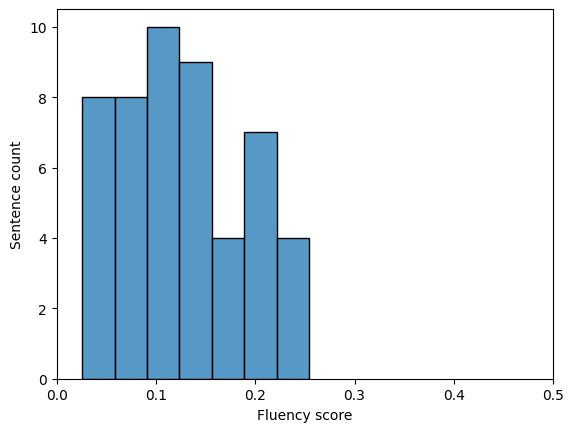

In [ ]:
sp1_t5 = sns.histplot(normalized_fl_t5[0])
sp1_t5.set_xlabel('Fluency score')
sp1_t5.set_xlim((0.0, 0.5))
sp1_t5.set_ylabel('Sentence count')

In [ ]:
sp1_t5.figure.savefig("t5-chatgpt-norm-fluency-score-range.png")

In [ ]:
print(36/50)

0.72


In [ ]:
print(48/50)

0.96


Generate fluency scores for BART-generated utterances

In [ ]:
fl_list_bart = []
for row in bart:
  for i in row:
    print(i)
    fl_score = fluency_score(i[0])
    print(fl_score)
    fl_list_bart.append(fl_score)
print(len(fl_list_bart))
print(len(bart))


["It can be difficult being creative and humorous at the same time. But don't worry,"]
0.05254566155129007
["It can be difficult being creative and humorous at the same time. But don't worry,"]
0.05254566155129007
["It can be difficult being creative and humorous at the same time. But don't worry,"]
0.05254566155129007
["It can be difficult being creative and humorous at the same time. But don't worry,"]
0.05254566155129007
["It can be difficult being creative and humorous at the same time. But don't worry,"]
0.05254566155129007
["Let's get creative! Here's an exercise to help you express your creativity: Pick one"]
0.04244724622846399
["Let's get creative! Here's an exercise to help you express your creativity: Pick one"]
0.04244724622846399
["Let's get creative! Here's an exercise to help you express your creativity: Pick one"]
0.04244724622846399
["Let's get creative! Here's an exercise to help you express your creativity: Pick one"]
0.04244724622846399
["Let's get creative! Here's 

Generate normalised scores for BART-generated utterances using sklearn

In [ ]:
normalized_fl_bart = preprocessing.normalize([fl_list_bart])

In [ ]:
fl_list_bart

[0.05254566155129007,
 0.05254566155129007,
 0.05254566155129007,
 0.05254566155129007,
 0.05254566155129007,
 0.04244724622846399,
 0.04244724622846399,
 0.04244724622846399,
 0.04244724622846399,
 0.04244724622846399,
 0.032193481171294794,
 0.032193481171294794,
 0.032193481171294794,
 0.032193481171294794,
 0.032193481171294794,
 0.046341320698648304,
 0.046341320698648304,
 0.046341320698648304,
 0.046341320698648304,
 0.046341320698648304,
 0.029420188491039178,
 0.029420188491039178,
 0.029420188491039178,
 0.029420188491039178,
 0.029420188491039178,
 0.030289151024713,
 0.030289151024713,
 0.030289151024713,
 0.030289151024713,
 0.030289151024713,
 0.03971140215967409,
 0.03971140215967409,
 0.03971140215967409,
 0.03971140215967409,
 0.03971140215967409,
 0.050497818950917754,
 0.050497818950917754,
 0.050497818950917754,
 0.050497818950917754,
 0.050497818950917754,
 0.03435443858956043,
 0.03435443858956043,
 0.03435443858956043,
 0.03435443858956043,
 0.03435443858956043,


In [ ]:
normalized_fl_bart

array([[0.19056819, 0.19056819, 0.19056819, 0.19056819, 0.19056819,
        0.1539441 , 0.1539441 , 0.1539441 , 0.1539441 , 0.1539441 ,
        0.11675661, 0.11675661, 0.11675661, 0.11675661, 0.11675661,
        0.1680668 , 0.1680668 , 0.1680668 , 0.1680668 , 0.1680668 ,
        0.10669866, 0.10669866, 0.10669866, 0.10669866, 0.10669866,
        0.10985015, 0.10985015, 0.10985015, 0.10985015, 0.10985015,
        0.14402197, 0.14402197, 0.14402197, 0.14402197, 0.14402197,
        0.18314124, 0.18314124, 0.18314124, 0.18314124, 0.18314124,
        0.12459379, 0.12459379, 0.12459379, 0.12459379, 0.12459379,
        0.06962836, 0.06962836, 0.06962836, 0.06962836, 0.06962836]])

Text(0, 0.5, 'Sentence count')

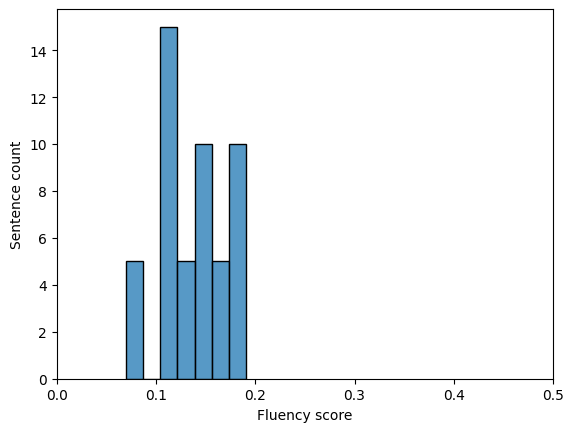

In [ ]:
sp1_bart = sns.histplot(normalized_fl_bart[0])
sp1_bart.set_xlabel('Fluency score')
sp1_bart.set_xlim((0.0, 0.5))

sp1_bart.set_ylabel('Sentence count')

In [ ]:
sp1_bart.figure.savefig("bart-norm-fluency-score-range.png")

In [ ]:
fl_list_chatgpt = []
for row in chatgpt:
  for i in row:
    print(i)
    fl_score = fluency_score(i)
    print(fl_score)
    fl_list_chatgpt.append(fl_score)
print(len(fl_list_chatgpt))
print(len(chatgpt))


It can be a challenge to be both creative and humorous, but don't worry - you can definitely do it! I'm here to help you out. The Self-Initiated Humour Protocol, based on humour theory and self-attachment methods, provides the groundwork for these activities. This will assist you in developing a light-hearted and imaginative attitude, which is vital for coming up with creative ideas. If you keep your atmosphere relaxed, you can look into diverse musings and become more inventive.
0.031123311832052452
It can be hard to be both funny and inventive simultaneously. Don't stress, though, it is absolutely doable! I'm here to assist you with it. The Self-Initiated Humour Protocol, which is based on comedy theory and self-affiliation methods, will serve as the basis for these activities. This will help you cultivate an amusing and fanciful frame of mind which is indispensable in forming imaginative ideas. With a tranquil setting, you can experiment with various pondering and be imaginative!
0.

In [ ]:
normalized_fl_chatgpt = preprocessing.normalize([fl_list_chatgpt])

Text(0, 0.5, 'Sentence count')

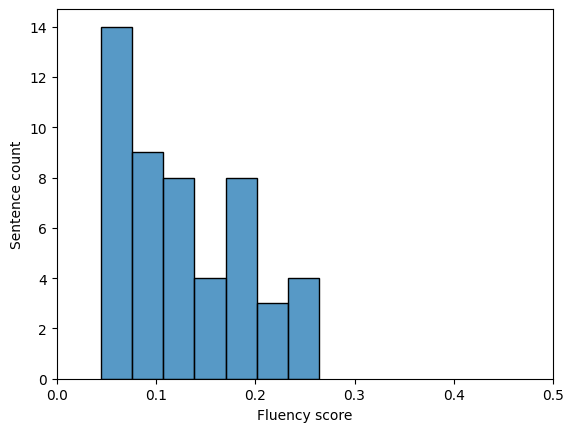

In [ ]:
sp1_chatgpt = sns.histplot(normalized_fl_chatgpt[0])
sp1_chatgpt.set_xlabel('Fluency score')
sp1_chatgpt.set_xlim((0.0, 0.5))

sp1_chatgpt.set_ylabel('Sentence count')

In [ ]:
sp1_chatgpt.figure.savefig("chatgpt-norm-fluency-score-range.png")
